In [ ]:
#!unzip ml-latest-small.zip

In [ ]:
import pandas as pd # pandas is a data manipulation library
import numpy as np #provides numerical arrays and functions to manipulate the arrays efficiently
import random
import matplotlib.pyplot as plt # data visualization library
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud

#Movies Analysis

In [ ]:
# lets explore movies.csv
data= pd.read_csv('/content/ml-latest-small/movies.csv')
data.shape

(9742, 3)

In [ ]:
data.head() #displays first 5 entries

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
#filtering to get the list of comedy movies
comedy_movies = data['genres'].str.contains('Comedy')
data[comedy_movies].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [ ]:
# filtering to get the list of drama movies
drama_movies=data['genres'].str.contains('Drama')
data[drama_movies].head()

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance


In [ ]:
# lets explore ratings.CSV
ratings_data=pd.read_csv('/content/ml-latest-small/ratings.csv',sep=',')
ratings_data.shape

(100836, 4)

In [ ]:
#summary of ratings.csv
ratings_data.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
#minimum rating given to a movie
ratings_data['rating'].min()

0.5

In [ ]:
#maximum rating given to a movie
ratings_data['rating'].max()

5.0

In [ ]:
#total number of drama movies
drama_movies.shape

(9742,)

In [ ]:
#total no. of comedy movies
comedy_movies.shape

(9742,)

In [ ]:
#displays first 5 data from a dataframe
#here rating.csv has 4 columns
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#displays first 5 data from a dataframe
#here ratings.csv has 3 columns
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#merging two dataframes "movies.csv" and "ratings.csv"
movie_data_ratings_data=data.merge(ratings_data,on = 'movieId',how = 'inner')
movie_data_ratings_data.head(3)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946


In [ ]:
#displays high rated movies
high_rated= movie_data_ratings_data['rating']>4.0
movie_data_ratings_data[high_rated].head(10)

,movieId,title,genres,userId,rating,timestamp
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,850466616
12,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,40,5.0,832058959
13,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,43,5.0,848993983
16,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,46,5.0,834787906
19,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,57,5.0,965796031
20,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,63,5.0,1443199669
24,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,71,5.0,864737933
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,73,4.5,1464196374


In [ ]:
# displays low rated movies
low_rated = movie_data_ratings_data['rating']<4.0
movie_data_ratings_data[low_rated].head()

,movieId,title,genres,userId,rating,timestamp
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,1407618878
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0,962685262
10,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,32,3.0,856736119


In [ ]:
#total number of unique movie genre
unique_genre=data['genres'].unique().tolist()
len(unique_genre)

951

In [ ]:
#top 25 most rated movies
most_rated = movie_data_ratings_data.groupby('title').size().sort_values(ascending=False)[:25]
most_rated.head(25)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

In [ ]:
#slicing out columns to display only title and genres columns from movies.csv
data[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [ ]:
# here we extract year from title
data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [ ]:
#define a function that counts the number of times each genre appear:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords:
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [ ]:
#here we  make census of the genres:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [ ]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596],
 ['Adventure', 1263],
 ['Crime', 1199],
 ['Sci-Fi', 980],
 ['Horror', 978],
 ['Fantasy', 779],
 ['Children', 664],
 ['Animation', 611],
 ['Mystery', 573],
 ['Documentary', 440],
 ['War', 382],
 ['Musical', 334],
 ['Western', 167],
 ['IMAX', 158],
 ['Film-Noir', 87],
 ['(no genres listed)', 34]]

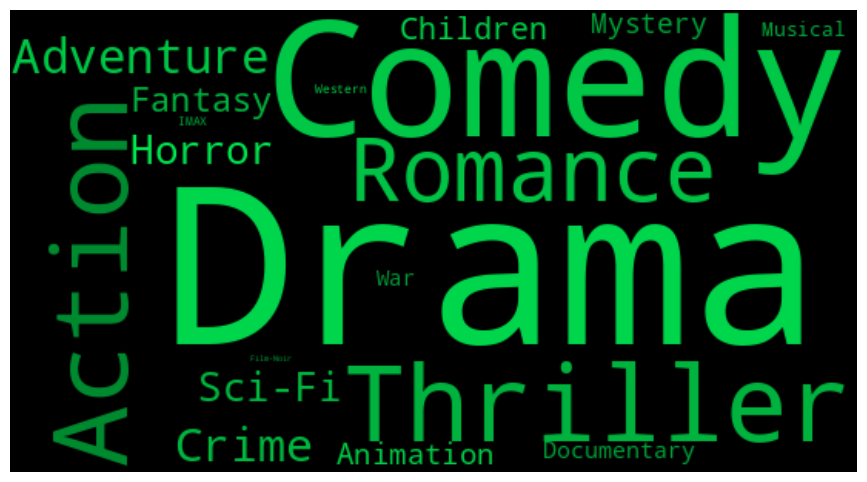

In [ ]:
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#Finally, the result is shown as a wordcloud:
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black',
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

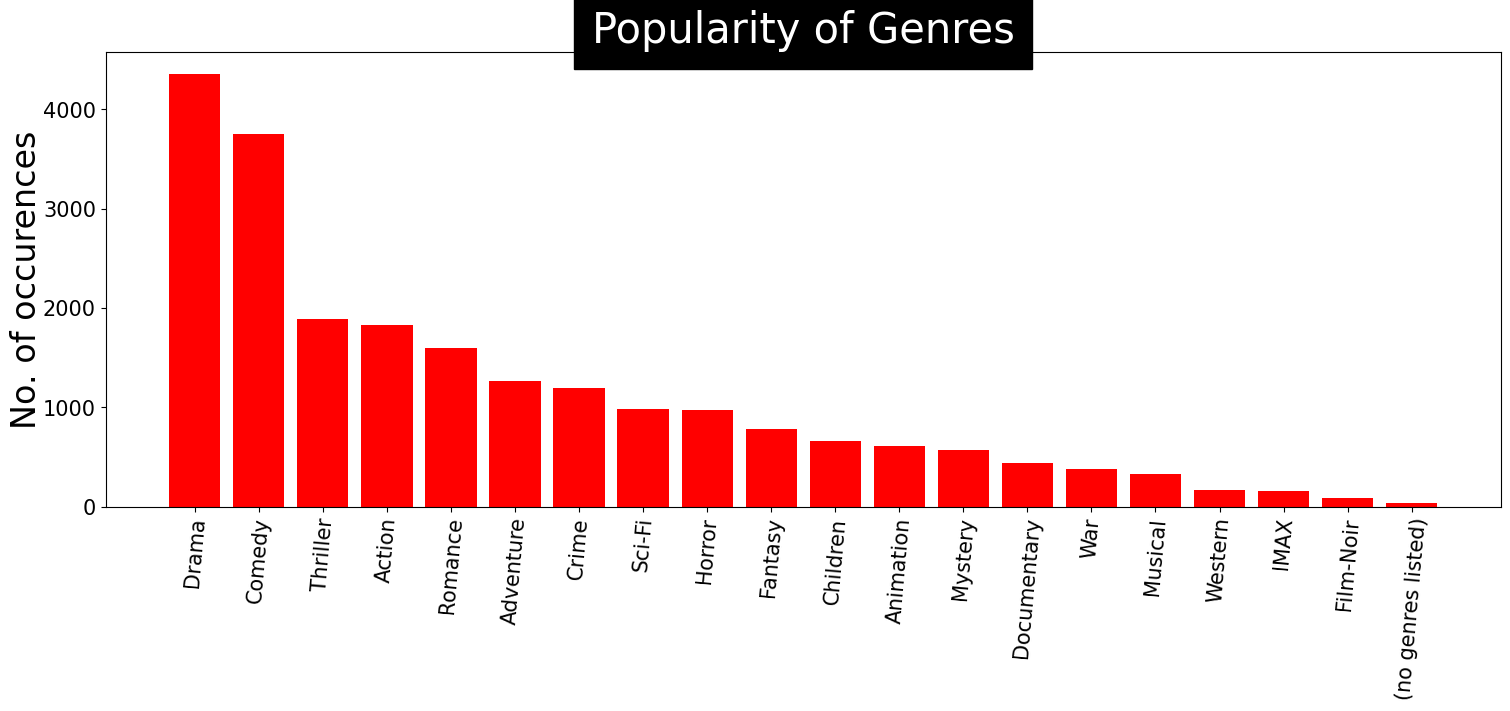

In [ ]:
# lets display the same result in the histogram
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

In [ ]:
import seaborn as sn


In [ ]:
ratings_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


<Axes: title={'center': 'Top 15 users with the most ratings'}, xlabel='UserID', ylabel='Number of submitted rating'>

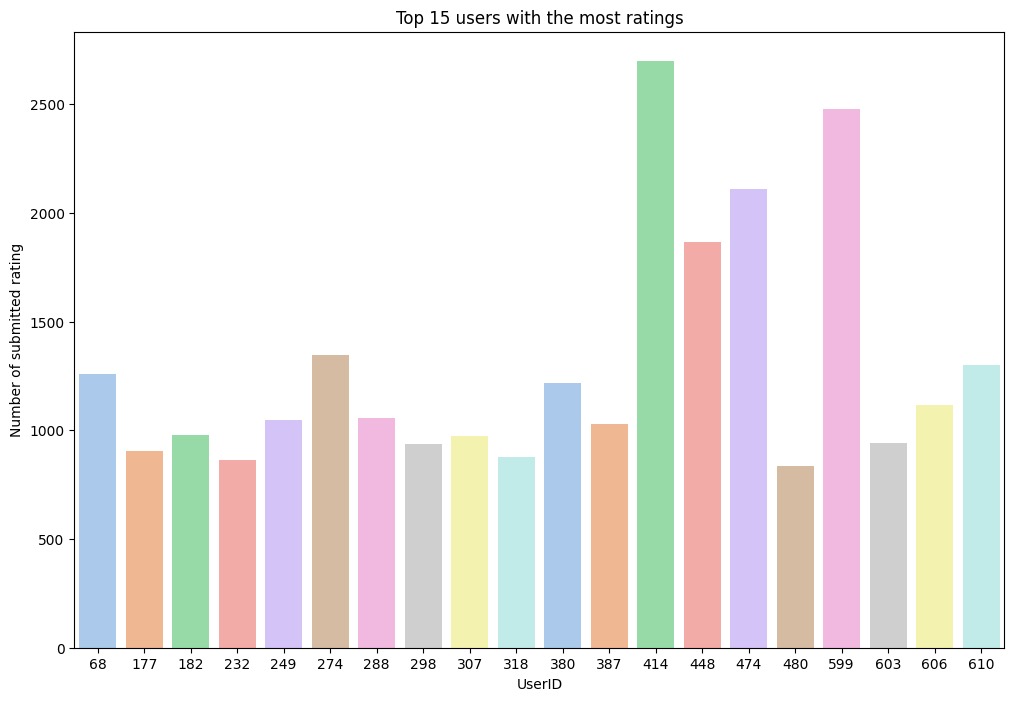

In [ ]:
x = ratings_data['userId'].value_counts()[:20]

plt.figure(figsize=(12,8))
plt.title('Top 15 users with the most ratings')
plt.xlabel('UserID')
plt.ylabel('Number of submitted rating')
sn.barplot(x=x.index, y=x.values, palette='pastel')



<Axes: title={'center': 'Average rating of users with the most ratings'}, xlabel='userId', ylabel='Average rating (user-based)'>

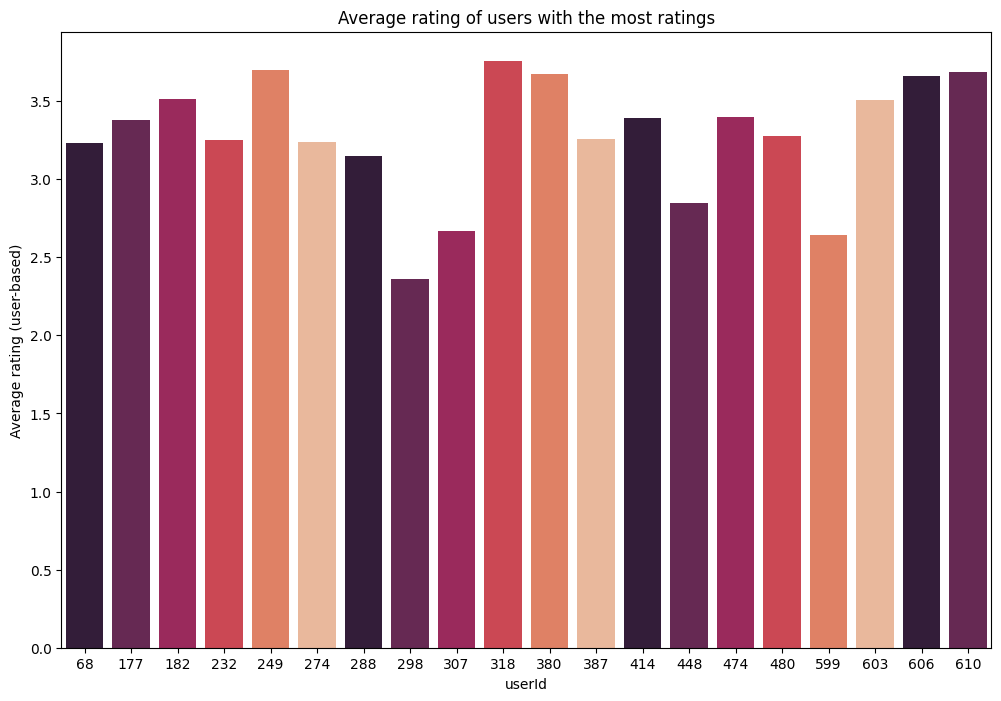

In [ ]:
x = ratings_data['userId'].value_counts()[:20]
common_avg_rating = ratings_data[ratings_data['userId'].isin(x.index)].groupby('userId')['rating'].mean().sort_values()
plt.figure(figsize=(12,8))
plt.title('Average rating of users with the most ratings')
plt.xlabel('UserID')
plt.ylabel('Average rating (user-based)')
sn.barplot(x=common_avg_rating.index, y=common_avg_rating.values, palette=sn.color_palette("rocket"))

<Axes: title={'center': 'Top 15 Movies with the most ratings'}, xlabel='MovieID', ylabel='Number of submitted rating'>

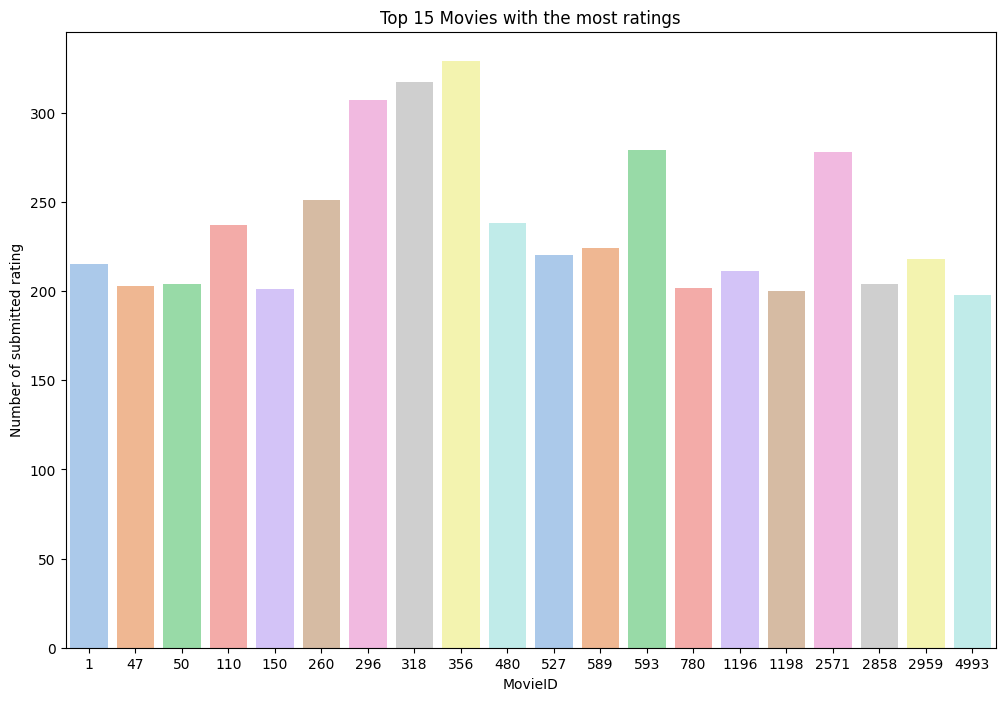

In [ ]:
x = ratings_data['movieId'].value_counts()[:20]

plt.figure(figsize=(12,8))
plt.title('Top 15 Movies with the most ratings')
plt.xlabel('MovieID')
plt.ylabel('Number of submitted rating')
sn.barplot(x=x.index, y=x.values, palette='pastel')

<Axes: title={'center': 'Average rating of movies with the most ratings'}, xlabel='movieId', ylabel='Average rating (movie-based)'>

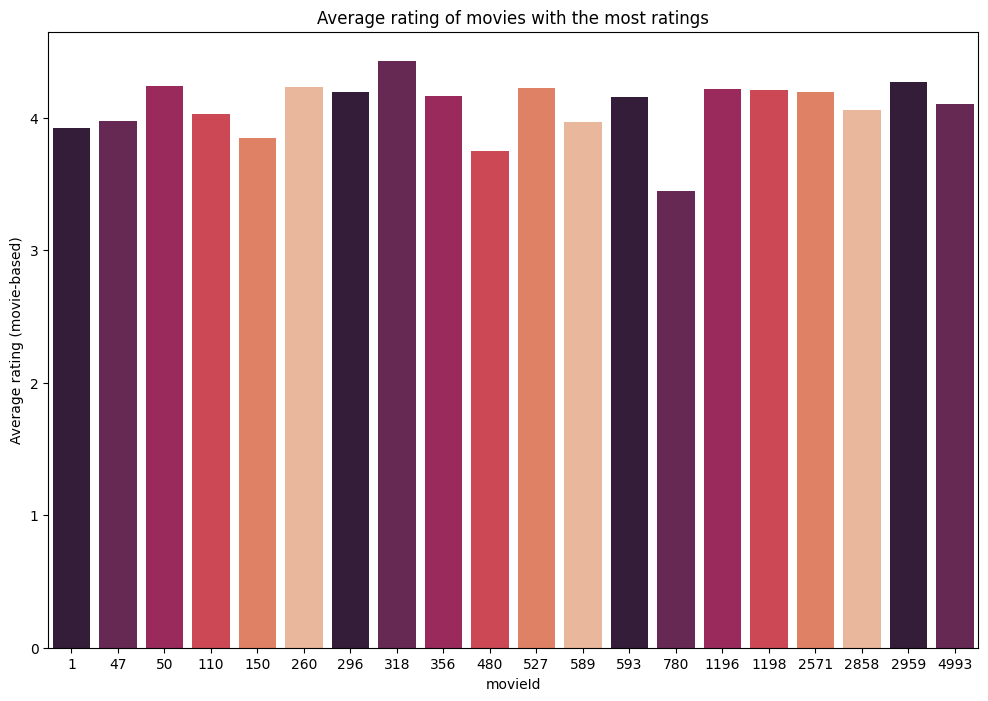

In [ ]:
x = ratings_data['movieId'].value_counts()[:20]
common_avg_rating = ratings_data[ratings_data['movieId'].isin(x.index)].groupby('movieId')['rating'].mean().sort_values()
plt.figure(figsize=(12,8))
plt.title('Average rating of movies with the most ratings')
plt.xlabel('MovieID')
plt.ylabel('Average rating (movie-based)')
sn.barplot(x=common_avg_rating.index, y=common_avg_rating.values, palette=sn.color_palette("rocket"))

<Axes: title={'center': 'Top 15 users with the least ratings'}, xlabel='UserID', ylabel='Number of submitted rating'>

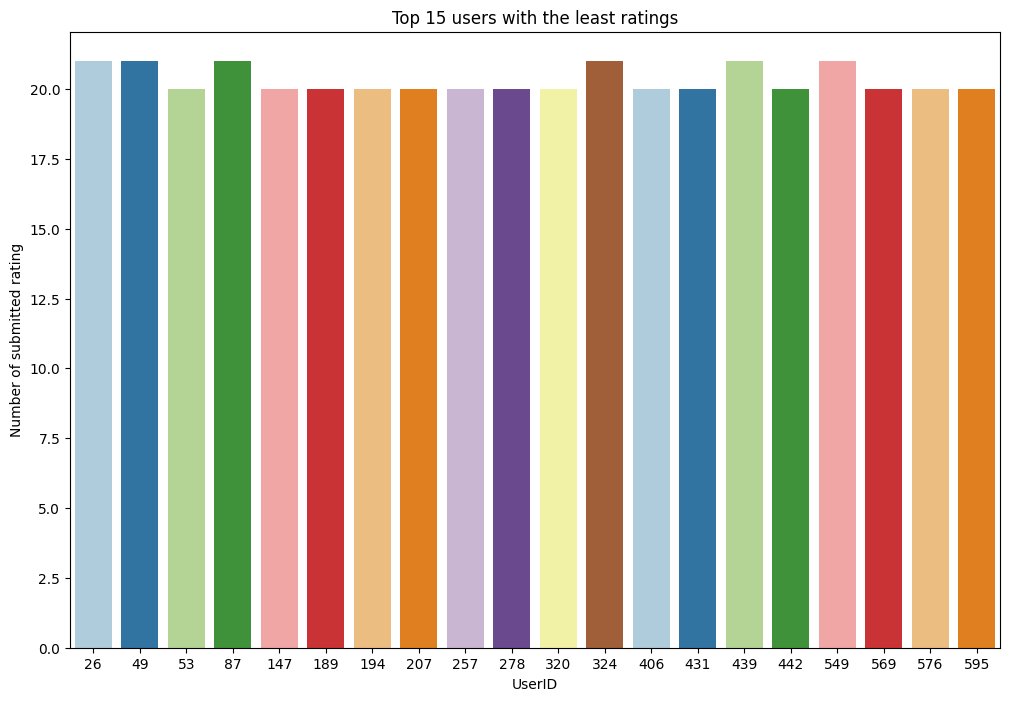

In [ ]:
x = ratings_data['userId'].value_counts()[-20:]

plt.figure(figsize=(12,8))
plt.title('Top 15 users with the least ratings')
plt.xlabel('UserID')
plt.ylabel('Number of submitted rating')
sn.barplot(x=x.index, y=x.values, palette=sn.color_palette("Paired"))

<Axes: title={'center': 'Average rating of users with the least ratings'}, xlabel='userId', ylabel='Average rating (user-based)'>

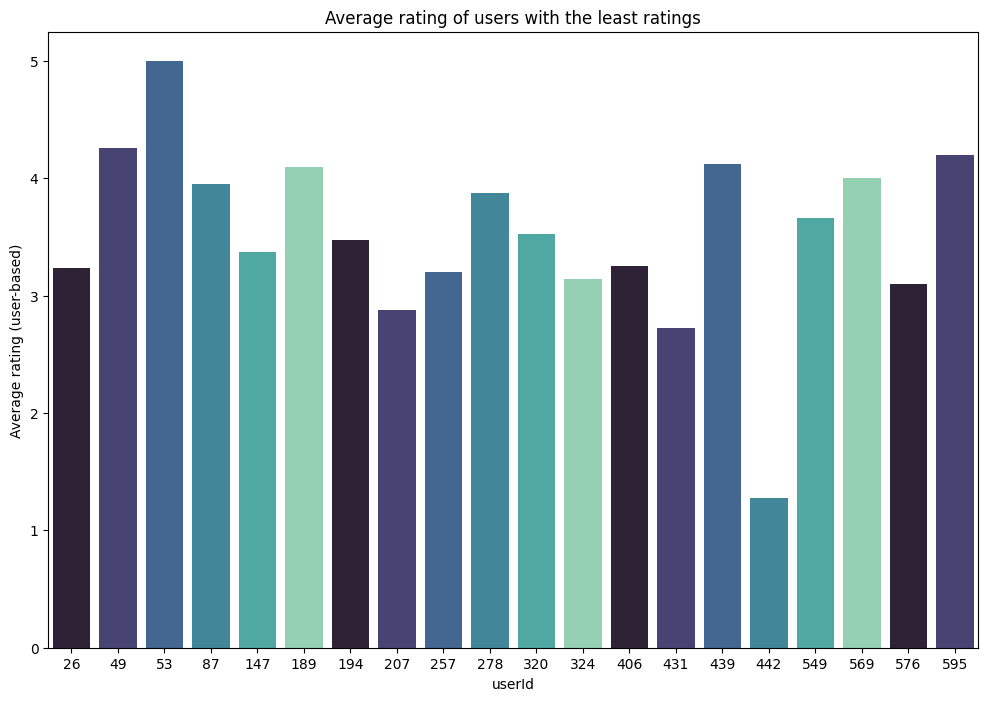

In [ ]:
x = ratings_data['userId'].value_counts()[-20:]
common_avg_rating = ratings_data[ratings_data['userId'].isin(x.index)].groupby('userId')['rating'].mean().sort_values()
plt.figure(figsize=(12,8))
plt.title('Average rating of users with the least ratings')
plt.xlabel('UserID')
plt.ylabel('Average rating (user-based)')
sn.barplot(x=common_avg_rating.index, y=common_avg_rating.values, palette=sn.color_palette("mako"))

<Axes: title={'center': 'Top 15 Movies with the least ratings'}, xlabel='MovieID', ylabel='Number of submitted rating'>

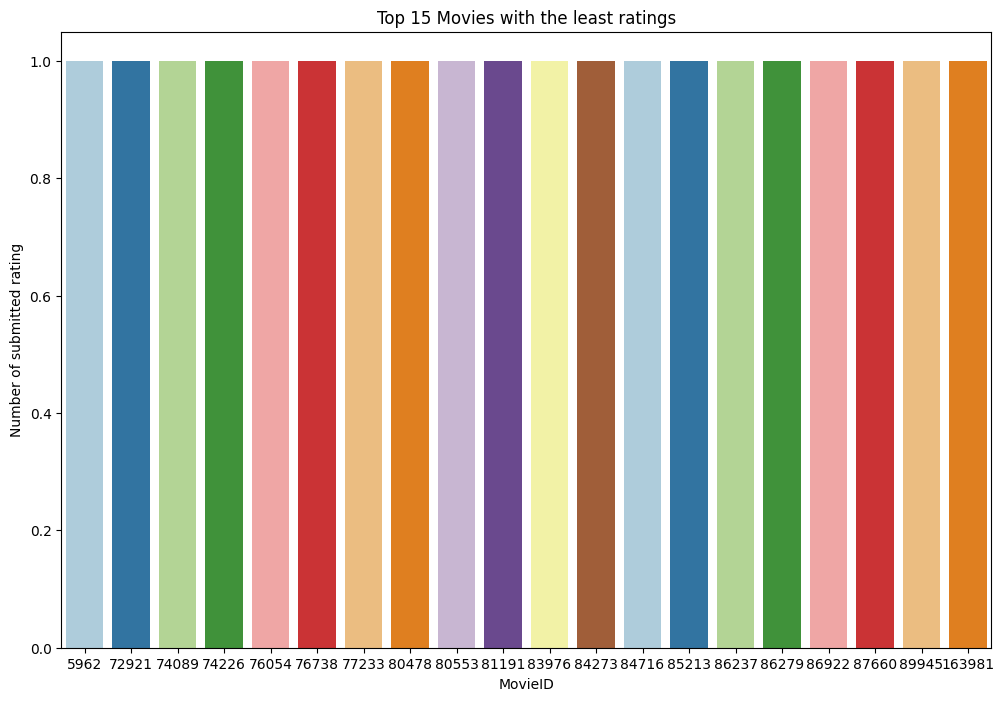

In [ ]:
x = ratings_data['movieId'].value_counts()[-20:]

plt.figure(figsize=(12,8))
plt.title('Top 15 Movies with the least ratings')
plt.xlabel('MovieID')
plt.ylabel('Number of submitted rating')
sn.barplot(x=x.index, y=x.values, palette=sn.color_palette("Paired"))

<Axes: title={'center': 'strictest Users'}, xlabel='userId', ylabel='Average rating (user-based)'>

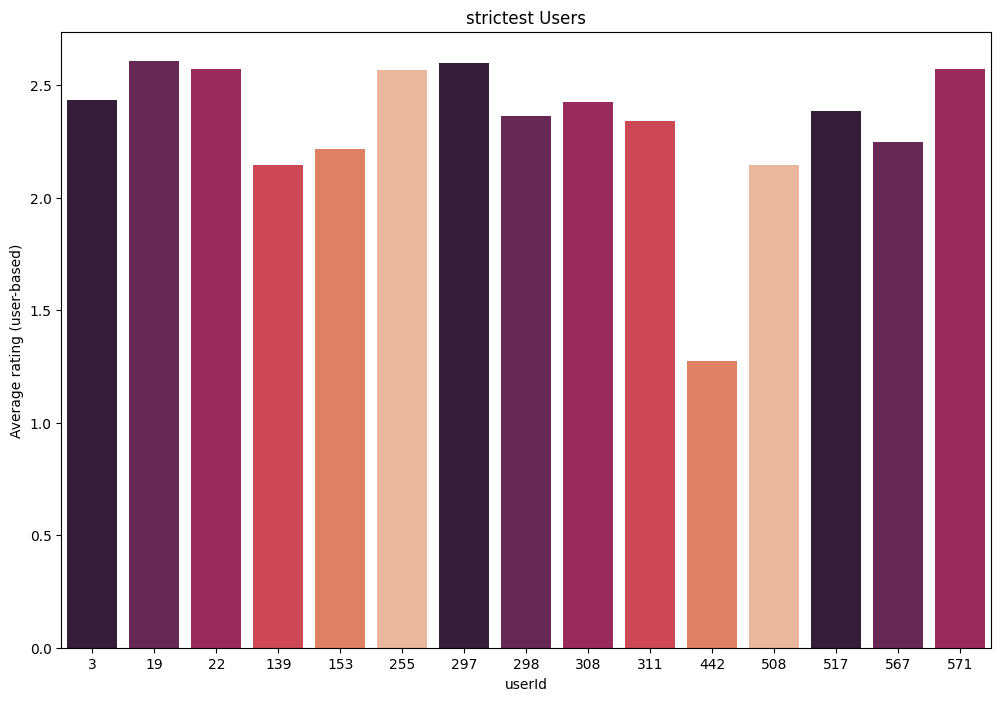

In [ ]:
avg_rating_user = ratings_data.groupby('userId')['rating'].mean().sort_values()

plt.figure(figsize=(12,8))
plt.title('strictest Users')
plt.xlabel('UserID')
plt.ylabel('Average rating (user-based)')
sn.barplot(x=avg_rating_user[:15].index, y=avg_rating_user[:15].values, palette=sn.color_palette("rocket"))